# Import Packages

In [247]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import folium
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer

# Import Data

## Via CSV Files

In [248]:
cust = pd.read_csv("data/Customer.csv", delimiter=';')
prod = pd.read_csv("data/Product.csv", delimiter=';')
stor = pd.read_csv("data/Store.csv", delimiter=';')
tran = pd.read_csv("data/Transaction.csv", delimiter=';')

In [249]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [250]:
tran

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4
...,...,...,...,...,...,...,...,...
5015,TR54423,243,31/12/2022,P10,15000,5,75000,3
5016,TR5604,271,31/12/2022,P2,3200,4,12800,9
5017,TR81224,52,31/12/2022,P7,9400,6,56400,9
5018,TR85016,18,31/12/2022,P8,16000,3,48000,13


## Marital Status (Imputation)

In [251]:
cust[cust.isna().any(axis=1)]

,CustomerID,Age,Gender,Marital Status,Income
9,10,34,1,NaN,4
415,416,27,1,NaN,"3,43"
442,443,33,1,NaN,"9,28"


In [252]:
# imputasi
mode_marital_status = cust[cust['Gender'] == 1]['Marital Status'].mode()[0]
cust.loc[cust['Gender'] == 1, 'Marital Status'] = cust.loc[cust['Gender'] == 1, 'Marital Status'].fillna(mode_marital_status)

## Age (Change Value)

In [253]:
mean_age_married = cust[(cust['Marital Status'] == 'Married') & (cust['Age'] != 0)]['Age'].mean()
cust.loc[(cust['Marital Status'] == 'Married') & (cust['Age'] == 0), 'Age'] = mean_age_married

In [254]:
cust[cust['Age']==0]

,CustomerID,Age,Gender,Marital Status,Income


## Transaction (Change Datatype)

In [255]:
tran.head(10)

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4
5,TR51675,283,01/01/2022,P10,15000,1,15000,5
6,TR54287,51,01/01/2022,P8,16000,2,32000,2
7,TR67455,49,01/01/2022,P5,4200,3,12600,13
8,TR73041,222,01/01/2022,P9,10000,6,60000,4
9,TR7596,270,01/01/2022,P7,9400,2,18800,14


In [256]:
tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [257]:
tran['Date'] = pd.to_datetime(tran['Date'], format='%d/%m/%Y')

## Merge Dataset

In [258]:
#Merge data, product tidak perlu sudah ada di transactions
df = tran.merge(stor, left_on="StoreID", right_on="StoreID")
df = df.merge(cust, left_on="CustomerID", right_on="CustomerID")
df.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,StoreName,GroupStore,Type,Latitude,Longitude,Age,Gender,Marital Status,Income
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,Prestasi Utama,Prestasi,General Trade,"-2,990934","104,756554",36.0,0,Married,"10,53"
1,TR97172,328,2022-05-21,P1,8800,5,44000,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666",36.0,0,Married,"10,53"
2,TR57013,328,2022-09-15,P7,9400,6,56400,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666",36.0,0,Married,"10,53"
3,TR51183,328,2022-11-19,P5,4200,4,16800,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666",36.0,0,Married,"10,53"
4,TR5063,328,2022-12-07,P5,4200,4,16800,5,Bonafid,Gita,General Trade,"-7,250445","112,768845",36.0,0,Married,"10,53"


# Data Cleansing

In [259]:
df = df.rename(columns={"Marital Status": "Status"})
df = df.drop(columns=["StoreName"])

In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  5020 non-null   object        
 1   CustomerID     5020 non-null   int64         
 2   Date           5020 non-null   datetime64[ns]
 3   ProductID      5020 non-null   object        
 4   Price          5020 non-null   int64         
 5   Qty            5020 non-null   int64         
 6   TotalAmount    5020 non-null   int64         
 7   StoreID        5020 non-null   int64         
 8   GroupStore     5020 non-null   object        
 9   Type           5020 non-null   object        
 10  Latitude       5020 non-null   object        
 11  Longitude      5020 non-null   object        
 12  Age            5020 non-null   float64       
 13  Gender         5020 non-null   int64         
 14  Status         5020 non-null   object        
 15  Income         5020 n

In [261]:
df['Income'] = df['Income'].str.replace(',', '.')
df['Latitude'] = df['Latitude'].str.replace(',', '.')
df['Longitude'] = df['Longitude'].str.replace(',', '.')

In [262]:
konversi = {
    'Gender': object,
    'Income': float,
    'StoreID': object,
    'CustomerID': object,
    'Age': int,
    'Latitude': float,
    'Longitude': float
}
df = df.astype(konversi)

In [263]:
df.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,GroupStore,Type,Latitude,Longitude,Age,Gender,Status,Income
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,Prestasi,General Trade,-2.990934,104.756554,36,0,Married,10.53
1,TR97172,328,2022-05-21,P1,8800,5,44000,1,Prima,Modern Trade,-6.200000,106.816666,36,0,Married,10.53
2,TR57013,328,2022-09-15,P7,9400,6,56400,1,Prima,Modern Trade,-6.200000,106.816666,36,0,Married,10.53
3,TR51183,328,2022-11-19,P5,4200,4,16800,1,Prima,Modern Trade,-6.200000,106.816666,36,0,Married,10.53
4,TR5063,328,2022-12-07,P5,4200,4,16800,5,Gita,General Trade,-7.250445,112.768845,36,0,Married,10.53


# Data Understanding

In [264]:
# Numeric and Non-Numeric
num = ['Price','Qty', 'Income', 'Age', 'TotalAmount']
df_num = df[num]
df_object = df.drop(num, axis=1)
df_object = df_object.drop(['Latitude', 'Longitude', 'CustomerID', 'TransactionID', 'Date'], axis=1)

df_object.head()

,ProductID,StoreID,GroupStore,Type,Gender,Status
0,P3,12,Prestasi,General Trade,0,Married
1,P1,1,Prima,Modern Trade,0,Married
2,P7,1,Prima,Modern Trade,0,Married
3,P5,1,Prima,Modern Trade,0,Married
4,P5,5,Gita,General Trade,0,Married


## Korelasi Numerik

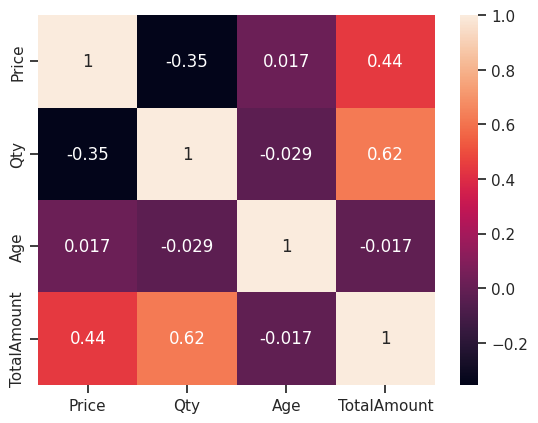

In [265]:
# Numeric Correlation
num_cor = df_num[['Price','Qty', 'Age', 'TotalAmount']].corr()
sns.heatmap(num_cor, annot=True)
plt.show()

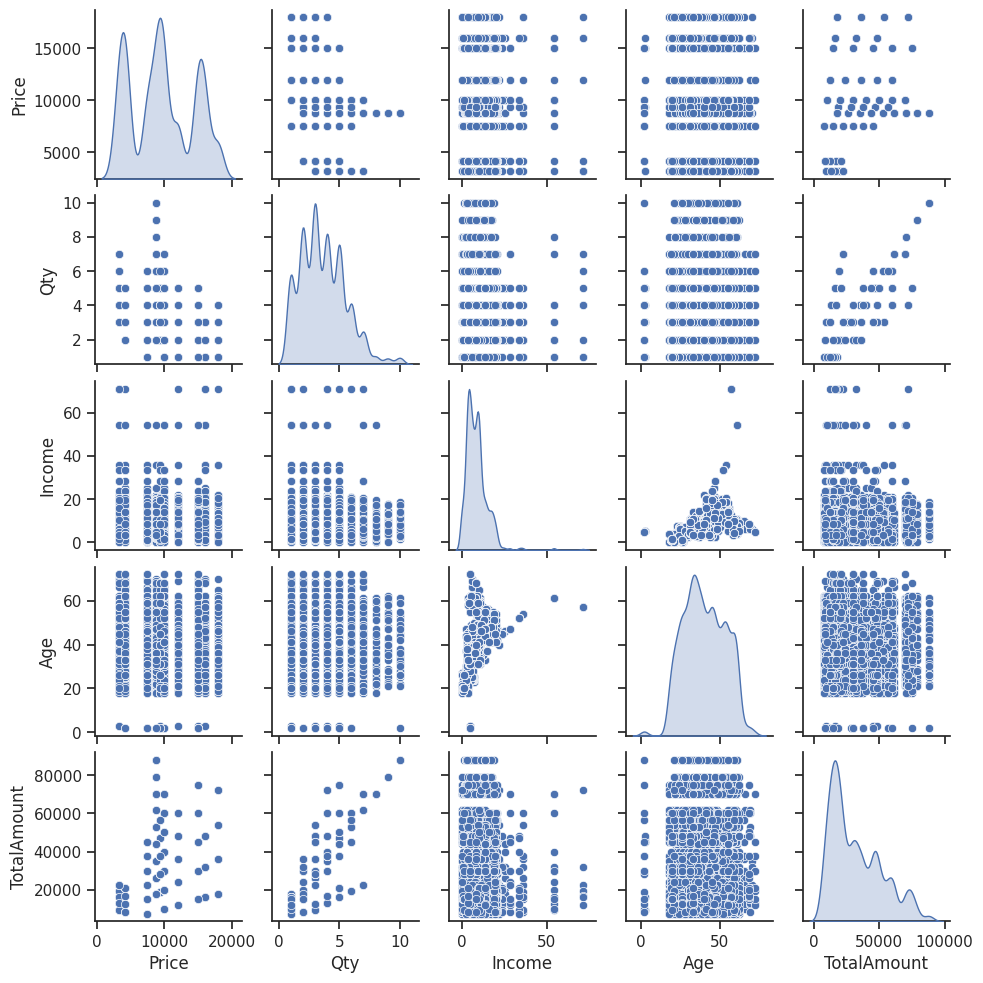

In [266]:
data_num = df_num[num]
sns.set(style="ticks")  # Atur gaya plot
sns.pairplot(data_num, kind="scatter", diag_kind='kde', height=2, aspect=1)
plt.show()


## Korelasi Non-Numerik

In [267]:
# Non-Numeric Correlation
pd.get_dummies(df_object).corr()

,ProductID_P1,ProductID_P10,ProductID_P2,ProductID_P3,ProductID_P4,ProductID_P5,ProductID_P6,ProductID_P7,ProductID_P8,ProductID_P9,...,GroupStore_Lingga,GroupStore_Prestasi,GroupStore_Priangan,GroupStore_Prima,Type_General Trade,Type_Modern Trade,Gender_0,Gender_1,Status_Married,Status_Single
ProductID_P1,1.000000,-0.110003,-0.100681,-0.099509,-0.085050,-0.128917,-0.067791,-0.099829,-0.095833,-0.096161,...,0.026340,0.032085,-0.012713,-0.003238,-0.009637,0.009637,0.027932,-0.027932,-0.007512,0.007512
ProductID_P10,-0.110003,1.000000,-0.128969,-0.127467,-0.108946,-0.165138,-0.086838,-0.127878,-0.122759,-0.123178,...,0.013426,-0.023653,-0.025652,0.039709,-0.029475,0.029475,-0.022072,0.022072,-0.013019,0.013019
ProductID_P2,-0.100681,-0.128969,1.000000,-0.116666,-0.099714,-0.151144,-0.079479,-0.117042,-0.112356,-0.112740,...,0.001984,0.007768,-0.006474,-0.015043,0.014392,-0.014392,0.005318,-0.005318,-0.011597,0.011597
ProductID_P3,-0.099509,-0.127467,-0.116666,1.000000,-0.098553,-0.149385,-0.078554,-0.115679,-0.111048,-0.111428,...,-0.020877,0.020124,-0.020072,0.021977,0.006928,-0.006928,0.010648,-0.010648,-0.003449,0.003449
ProductID_P4,-0.085050,-0.108946,-0.099714,-0.098553,1.000000,-0.127679,-0.067140,-0.098871,-0.094913,-0.095237,...,0.020312,-0.014413,0.038540,-0.036689,-0.003744,0.003744,0.008470,-0.008470,0.008721,-0.008721
ProductID_P5,-0.128917,-0.165138,-0.151144,-0.149385,-0.127679,1.000000,-0.101769,-0.149866,-0.143867,-0.144359,...,-0.019333,-0.000656,0.006178,-0.002540,0.012772,-0.012772,-0.005719,0.005719,-0.006221,0.006221
ProductID_P6,-0.067791,-0.086838,-0.079479,-0.078554,-0.067140,-0.101769,1.000000,-0.078807,-0.075652,-0.075911,...,0.014121,0.006550,-0.002062,0.006360,-0.014324,0.014324,0.031915,-0.031915,0.003840,-0.003840
ProductID_P7,-0.099829,-0.127878,-0.117042,-0.115679,-0.098871,-0.149866,-0.078807,1.000000,-0.111406,-0.111787,...,-0.012422,0.002497,0.005208,-0.001304,0.007300,-0.007300,0.034690,-0.034690,0.019096,-0.019096
ProductID_P8,-0.095833,-0.122759,-0.112356,-0.111048,-0.094913,-0.143867,-0.075652,-0.111406,1.000000,-0.107312,...,-0.004381,-0.021895,0.009507,0.001924,-0.003328,0.003328,-0.028853,0.028853,-0.002142,0.002142
ProductID_P9,-0.096161,-0.123178,-0.112740,-0.111428,-0.095237,-0.144359,-0.075911,-0.111787,-0.107312,1.000000,...,-0.007105,-0.003453,0.011586,-0.017111,0.013372,-0.013372,-0.048552,0.048552,0.016351,-0.016351


## Distribusi Data Numerik

In [268]:
# Standarisasi data menggunakan StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_num.drop(['Price','Income'], axis=1))

# Konversi hasil penskalaan kembali ke DataFrame
scaled_df = pd.DataFrame(scaled_df, columns=['Qty', 'Age', 'TotalAmount'])

# Membuat Box Plot menggunakan Plotly
fig = go.Figure()

# Menambahkan box plot untuk setiap kolom
for col in scaled_df.columns:
    fig.add_trace(go.Box(y=scaled_df[col], name=col))

# Mengatur tampilan dan tata letak
fig.update_layout(title='Box Plot Data Numerik', yaxis_title='Skala Standar', showlegend=True, width=800)
fig.show()

## Proporsi

In [298]:
# Visualisasi proporsi Gender menggunakan Plotly Bar Chart
gender_counts = cust['Gender'].value_counts()
gender_text = [f'{count}' for count in gender_counts.values]
gender_fig = go.Figure(data=[go.Bar(x=gender_counts.index, y=gender_counts.values, marker_color=['pink', 'cyan'], text=gender_text, textposition='auto')])
gender_fig.update_layout(title='Proporsi Gender', xaxis_title='Gender', yaxis_title='Count')

# Visualisasi proporsi Marital Status menggunakan Plotly Bar Chart
status_counts = cust['Marital Status'].value_counts()
status_text = [f'{count}' for count in status_counts.values]
status_fig = go.Figure(data=[go.Bar(x=status_counts.index, y=status_counts.values, marker_color=['purple', 'crimson'], text=status_text, textposition='auto')])
status_fig.update_layout(title='Prarital Status', xaxis_title='Marital Status', yaxis_title='Count')

# Mengatur tata letak subplot bersebelahan
fig = make_subplots(rows=1, cols=2, subplot_titles=("Proporsi Gender", "Proporsi Marital Status"))
fig.add_trace(gender_fig.data[0], row=1, col=1)
fig.add_trace(status_fig.data[0], row=1, col=2)

# Mengatur tata letak dan tampilan
fig.update_layout(height=500, width=1000, showlegend=False)
fig.show()

## Product

In [308]:
# Mengurutkan DataFrame berdasarkan Price (harga produk) secara menurun
sort_prod = prod.sort_values(by='Price', ascending=False)
sort_prod

,ProductID,Product Name,Price
5,P6,Cashew,18000
7,P8,Oat,16000
9,P10,Cheese Stick,15000
3,P4,Potato Chip,12000
8,P9,Yoghurt,10000
6,P7,Coffee Candy,9400
0,P1,Choco Bar,8800
2,P3,Crackers,7500
4,P5,Thai Tea,4200
1,P2,Ginger Candy,3200


In [309]:

# Membuat Bar Chart berdasarkan ProductName
fig = go.Figure()

fig.add_trace(go.Bar(
    x=sort_prod['Product Name'],
    y=sort_prod['Price'],
    text=sort_prod['Price'],  # Menampilkan nilai harga pada setiap bar
    textposition='outside'  # Menempatkan teks nilai harga di luar setiap bar
))

# Mengatur tampilan dan tata letak
fig.update_layout(
    title='Harga Produk Berdasarkan Nama Produk',
    xaxis_title='Nama Produk',
    yaxis_title='Harga (IDR)',
    showlegend=False,  # Tidak menampilkan legenda
    width=800,  # Mengatur lebar plot menjadi 800 piksel
    height=400  # Mengatur tinggi plot menjadi 400 piksel
)

# Menampilkan plot
fig.show()

## Peta

In [270]:
stor['Latitude'] = stor['Latitude'].str.replace(',', '.')
stor['Longitude'] = stor['Longitude'].str.replace(',', '.')

In [271]:
konversi = {

    'Latitude': float,
    'Longitude': float
}
stor = stor.astype(konversi)

In [307]:
# Membuat peta
mymap = folium.Map(location=[stor['Latitude'].mean(), stor['Longitude'].mean()], zoom_start=5)

# Menambahkan marker untuk setiap lokasi
for idx, row in stor.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['StoreName'],  # Menampilkan nama toko sebagai label pada marker
        icon=folium.Icon(color='blue', icon='shopping-cart', prefix='fa')
    ).add_to(mymap)

# Menampilkan peta
mymap

### Customer Distribution

In [274]:
# Menghitung jumlah pelanggan untuk setiap storeID
customer_count = df.groupby('StoreID')['CustomerID'].nunique()
# Mengubah customer_count menjadi DataFrame
customer_count_df = pd.DataFrame({'StoreID': customer_count.index, 'Customer_Count': customer_count.values})


In [275]:
# Menggabungkan DataFrame customer_count_df dengan store berdasarkan kolom StoreID
customer_count_df = customer_count_df.merge(stor[['StoreID', 'StoreName']], on='StoreID', how='left')
# Mengganti nama StoreName pada indeks tertentu
index_to_change = [5, 7, 8, 10]
new_store_names = ['Lingga_1', 'Sinar Harapan (HP)', 'Lingga_2', 'Sinar Harapan (Pres)']

customer_count_df.loc[index_to_change, 'StoreName'] = new_store_names
customer_count_df


,StoreID,Customer_Count,StoreName
0,1,238,Prima Tendean
1,2,246,Prima Kelapa Dua
2,3,236,Prima Kota
3,4,244,Gita Ginara
4,5,245,Bonafid
5,6,257,Lingga_1
6,7,240,Buana Indah
7,8,239,Sinar Harapan (HP)
8,9,254,Lingga_2
9,10,246,Harapan Baru


In [276]:
# Membuat Bar Chart Horizontal berdasarkan StoreID
fig = go.Figure()

fig.add_trace(go.Bar(
    x=customer_count_df['Customer_Count'],
    y=customer_count_df['StoreName'],
    orientation='h',  # Mengatur orientasi menjadi horizontal
    text=customer_count_df['Customer_Count'],  # Menampilkan nilai untuk setiap bar
    textposition='outside'  # Menempatkan teks nilai di luar setiap bar
))

# Mengatur tampilan dan tata letak
fig.update_layout(
    title='Jumlah Pelanggan untuk Setiap Store',
    xaxis_title='Jumlah Pelanggan',
    yaxis_title='StoreName',
    showlegend=False,  # Tidak menampilkan legenda
    width=800,  # Mengatur lebar plot menjadi 800 piksel
    height=400,  # Mengatur tinggi plot menjadi 400 piksel
    margin=dict(l=50, r=50, b=50, t=50),  # Mengatur margin untuk menghindari bar terlalu panjang
    xaxis=dict(tickmode='linear', tick0=0, dtick=100, range=[0,600])
)

# Menampilkan plot
fig.show()

# Time Series Analysis

## Data Preparation

In [277]:
data_time = df.groupby('Date').agg({'Qty': 'sum'}).reset_index() # Dataframe untuk timeseries
data_time.set_index('Date', inplace=True)
print(data_time.head())

            Qty
Date           
2022-01-01   49
2022-01-02   59
2022-01-03   63
2022-01-04   45
2022-01-05   30


## Visualisasi ACF dan PACF

In [278]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


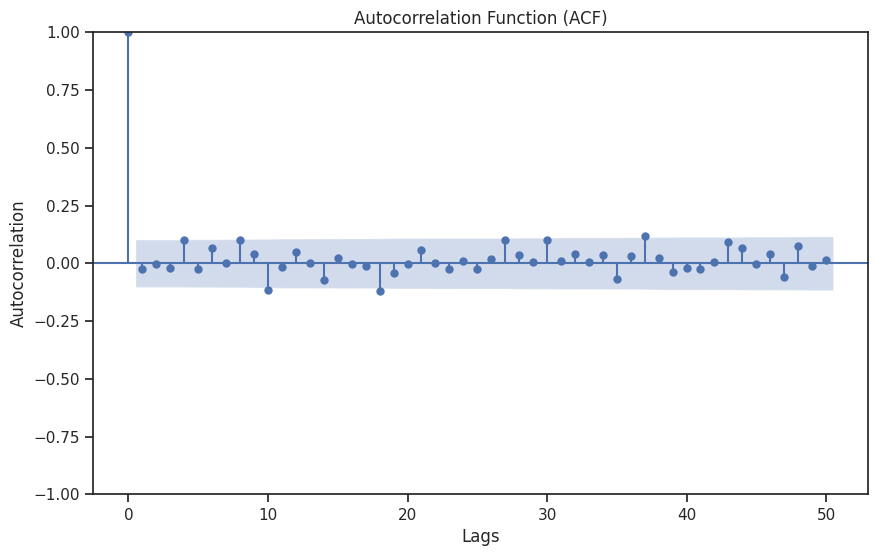

In [279]:
# Membuat plot ACF
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(data_time["Qty"], ax=ax, lags=50)  # Mengatur lags sesuai kebutuhan
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

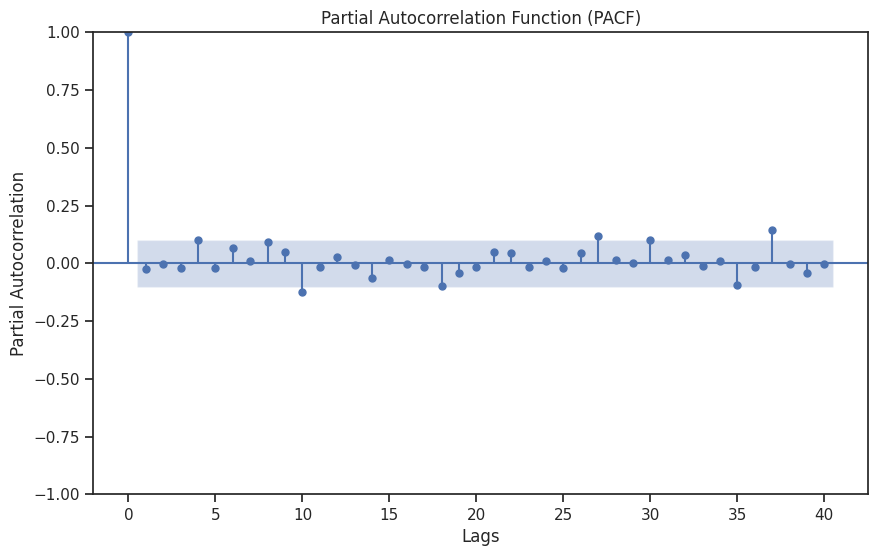

In [280]:
# Membuat plot PACF
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(data_time['Qty'], ax=ax, lags=40)  # Mengatur lags sesuai kebutuhan
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

## Uji Stasioner (ADF-Test)

In [281]:
from statsmodels.tsa.stattools import adfuller, kpss

### Terhadap Mean

In [282]:
# Uji ADF untuk mengecek stasioneritas terhadap mean
result_mean = adfuller(data_time['Qty'])
print('ADF Statistic (mean):', result_mean[0])
print('p-value (mean):', result_mean[1])
print('Critical Values (mean):')
for key, value in result_mean[4].items():
    print(key, ':', value)

ADF Statistic (mean): -19.448086319449082
p-value (mean): 0.0
Critical Values (mean):
1% : -3.4484434475193777
5% : -2.869513170510808
10% : -2.571017574266393


Dengan kepercayaan 95%, data tersebut adalah stasioner terhadap mean, Bisa dilihat dari nilai ADF-Statistic nya lebih negatif dari nilai kritis 5% dan nilai p-value lebihj kecil dari 0.05 (5%)

### Terhadap Varian

In [283]:
# Uji ADF untuk mengecek stasioneritas terhadap varian
result_variance = adfuller(data_time['Qty'], regression='n')
print('ADF Statistic (variance):', result_variance[0])
print('p-value (variance):', result_variance[1])
print('Critical Values (variance):')
for key, value in result_variance[4].items():
    print(key, ':', value)

ADF Statistic (variance): -0.5348752842497762
p-value (variance): 0.4817361495545843
Critical Values (variance):
1% : -2.5720489556242896
5% : -1.941780353608634
10% : -1.616094785008277


Dengan selang kepercayaan 95%, data tersebut tidak stasioner terhadap mean, bisa dilihat dari nilai kritis 5% lebih negatif dari nilai ADF-Statistic nya dan p-value lebih besar dari 0.05 (5%)

## Modelling

### Model Fitting

In [284]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data_time, train_size=.8,shuffle=False)

In [285]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

data_time = data_time.asfreq(freq='D') # Setiap hari
best_model = SARIMAX(data_time, order=(3, 1, 0), seasonal_order=(2, 1, 0, 12), trend='c')

# Fitting the SARIMA model to the data
best_result = best_model.fit(disp=False)

In [286]:
best_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                Qty   No. Observations:                  365
Model:             SARIMAX(3, 1, 0)x(2, 1, 0, 12)   Log Likelihood               -1574.412
Date:                            Sun, 30 Jul 2023   AIC                           3162.825
Time:                                    19:31:18   BIC                           3189.870
Sample:                                01-01-2022   HQIC                          3173.588
                                     - 12-31-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0508      1.179      0.043      0.966      -2.259       2.361
ar.L1         -0.7714      0.054    -14.265      0.000      -0.877      -0.665
ar.L2         -0.5232      0.065     -8.008      0.000      -0.651      -0.395
ar.L3         -0.3272      0.058     -5.675      0.000      -0.440      -0.214
ar.S.L12      -0.6276      0.053    -11.760      0.000      -0.732      -0.523
ar.S.L24      -0.3462      0.052     -6.601      0.000      -0.449      -0.243
sigma2       440.7002     32.486     13.566      0.000     377.028     504.372
===================================================================================
Ljung-Box (L1) (Q):                   1.31   Jarque-Bera (JB):                 0.30
Prob(Q):                              0.25   Prob(JB):                         0.86
Heteroskedasticity (H):               0.81   Skew:                            -0.04
Prob(H) (two-sided):                  0.27   Kurtosis:                         3.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Metrics

In [287]:
test['Predict'] = best_result.predict(start=(len(train)), end=(len(train)+len(test)+2))
best_result_residual = best_result.resid

In [288]:
# Calculate the evaluation metrics
mae = np.mean(np.abs(best_result_residual))
mse = np.mean(best_result_residual**2)
rmse = np.sqrt(mse)
mape = np.mean(np.abs(best_result_residual / data_time['Qty'])) * 100
mad = sm.robust.scale.mad(best_result_residual)
# Print the evaluation metrics
print('MAE:', mae)
print("MAPE:", mape)
print('MSE:', mse)
print('RMSE:', rmse)
print('MAD:', mad)

MAE: 16.864770709028214
MAPE: 39.81149511565861
MSE: 462.1624149075004
RMSE: 21.497963040890653
MAD: 21.055868684229306


## Visualization

In [289]:
# Convert the Date index to a string for Plotly compatibility
data_time['Date'] = data_time.index.strftime('%Y-%m-%d')
test['Date'] = test.index.strftime('%Y-%m-%d')

# Create a Plotly figure
fig = go.Figure()

# Add trace for the actual values
fig.add_trace(go.Scatter(x=data_time['Date'], y=data_time['Qty'], mode='lines', name='Expected Values'))

# Add trace for the predicted values
fig.add_trace(go.Scatter(x=test['Date'], y=test['Predict'], mode='lines', name='Predicted Values'))

# Update layout
fig.update_layout(title='ARIMA Model: Expected vs. Predicted Values',
                  xaxis_title='Date', yaxis_title='Qty')

# Show the plot
fig.show()

## Transformasi Yeo-Johnson

In [290]:
# Initialize PowerTransformer with method='box-cox' or method='yeo-johnson'
transformer = PowerTransformer(method='yeo-johnson')

# Reshape the 'Qty' column to a 2D array for fit_transform
qty_values = data_time['Qty'].values.reshape(-1, 1)

# Fit and transform the data using PowerTransformer
data_time['Qty_transformed'] = transformer.fit_transform(qty_values)

# Print the DataFrame with the transformed 'Qty' column
print(data_time.head())

            Qty        Date  Qty_transformed
Date                                        
2022-01-01   49  2022-01-01         0.028748
2022-01-02   59  2022-01-02         0.601621
2022-01-03   63  2022-01-03         0.814959
2022-01-04   45  2022-01-04        -0.219225
2022-01-05   30  2022-01-05        -1.283805


### Modelling

#### Model Fitting

In [291]:
data_time = data_time.drop(['Qty'], axis=1)
train_trans, test_trans = train_test_split(data_time, train_size=.8,shuffle=False)
best_model_trans = SARIMAX(data_time['Qty_transformed'], order=(3, 1, 0), seasonal_order=(2, 1, 0, 12), trend='c')

# Fitting the SARIMA model to the data
best_result_trans = best_model_trans.fit(disp=False)
best_result_trans.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                    Qty_transformed   No. Observations:                  365
Model:             SARIMAX(3, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -588.099
Date:                            Sun, 30 Jul 2023   AIC                           1190.199
Time:                                    19:31:24   BIC                           1217.244
Sample:                                01-01-2022   HQIC                          1200.961
                                     - 12-31-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0047      0.073      0.064      0.949      -0.138       0.147
ar.L1         -0.7858      0.055    -14.332      0.000      -0.893      -0.678
ar.L2         -0.5381      0.067     -7.985      0.000      -0.670      -0.406
ar.L3         -0.3264      0.057     -5.691      0.000      -0.439      -0.214
ar.S.L12      -0.6182      0.055    -11.339      0.000      -0.725      -0.511
ar.S.L24      -0.3405      0.053     -6.398      0.000      -0.445      -0.236
sigma2         1.6237      0.120     13.486      0.000       1.388       1.860
===================================================================================
Ljung-Box (L1) (Q):                   1.34   Jarque-Bera (JB):                 4.76
Prob(Q):                              0.25   Prob(JB):                         0.09
Heteroskedasticity (H):               0.92   Skew:                            -0.27
Prob(H) (two-sided):                  0.65   Kurtosis:                         3.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Metrics

In [292]:
test_trans['Predict'] = best_result_trans.predict(start=(len(train_trans)), end=(len(train_trans)+len(test_trans)+2))
best_result_residual_trans = best_result_trans.resid

In [293]:
# Calculate the evaluation metrics
mae1 = np.mean(np.abs(best_result_residual_trans))
mse1 = np.mean(best_result_residual_trans**2)
rmse1 = np.sqrt(mse)
mape1 = np.mean(np.abs(best_result_residual_trans / data_time['Qty_transformed'])) * 100
mad1 = sm.robust.scale.mad(best_result_residual_trans)
# Print the evaluation metrics
print('MAE:', mae1)
print("MAPE:", mape1)
print('MSE:', mse1)
print('RMSE:', rmse1)
print('MAD:', mad1)

MAE: 1.0111259314917334
MAPE: 306.5694687181884
MSE: 1.6625230694186341
RMSE: 21.497963040890653
MAD: 1.2136717400194648


### Visualization

In [294]:
# Convert the Date index to a string for Plotly compatibility
data_time['Date'] = data_time.index.strftime('%Y-%m-%d')
test_trans['Date'] = test_trans.index.strftime('%Y-%m-%d')

# Create a Plotly figure
fig = go.Figure()

# Add trace for the actual values
fig.add_trace(go.Scatter(x=data_time['Date'], y=data_time['Qty_transformed'], mode='lines', name='Expected Values'))

# Add trace for the predicted values
fig.add_trace(go.Scatter(x=test_trans['Date'], y=test_trans['Predict'], mode='lines', name='Predicted Values'))

# Update layout
fig.update_layout(title='ARIMA Model (Transformed): Expected vs. Predicted Values',
                  xaxis_title='Date', yaxis_title='Qty_transformed')

# Show the plot
fig.show()

# Customer Segmentation

## Data Preparation

In [189]:
df_clus = df[['TransactionID','CustomerID', 'Qty', 'TotalAmount']]
df_clus.head()

,TransactionID,CustomerID,Qty,TotalAmount
0,TR11369,328,4,30000
1,TR97172,328,5,44000
2,TR57013,328,6,56400
3,TR51183,328,4,16800
4,TR5063,328,4,16800


In [190]:
df_clus['Frequency'] = df_clus.groupby('CustomerID')['CustomerID'].transform('count')

/tmp/ipykernel_25844/957975786.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [191]:
df_clus = df_clus.groupby('CustomerID').agg({'Qty':'sum', 'TotalAmount': 'sum' ,'Frequency': 'first'}).reset_index()
print(df_clus.head())

   CustomerID  Qty  TotalAmount  Frequency
0           1   60       623300         17
1           2   57       392300         13
2           3   56       446200         15
3           4   46       302500         10
4           5   27       268600          7


## Modelling

In [192]:
from sklearn.cluster import KMeans
import warnings
from sklearn.metrics import silhouette_score

### Elbow Method

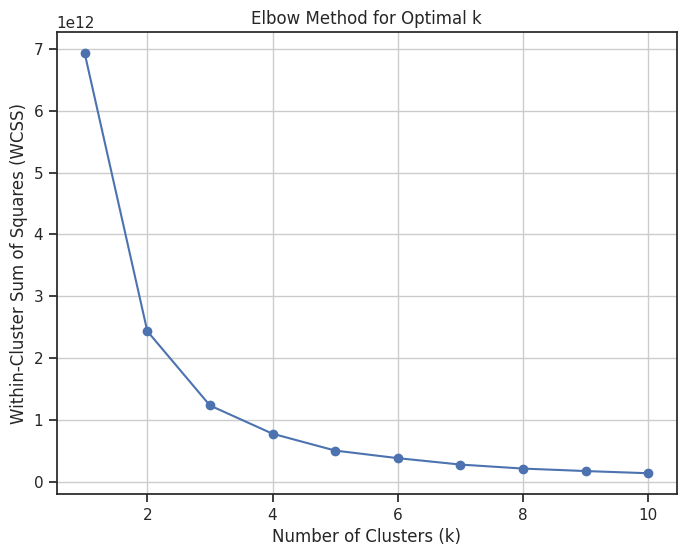

In [193]:
# Ignore the FutureWarning temporarily
warnings.filterwarnings('ignore', category=FutureWarning)

wcss = []

# Try different values of k (number of clusters)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_clus)
    wcss.append(kmeans.inertia_)  # Inertia_ attribute gives the WCSS value

# Plot the WCSS values against the number of clusters (k)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

### Model Fitting

In [194]:
# Standardisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clus)

# Buat model KMeans dengan jumlah cluster (k) yang ditentukan
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

# Tambahkan kolom 'Cluster' ke DataFrame asli untuk menyimpan hasil klaster
df_clus['Cluster'] = cluster_labels
df_clus.set_index('CustomerID', inplace=True)

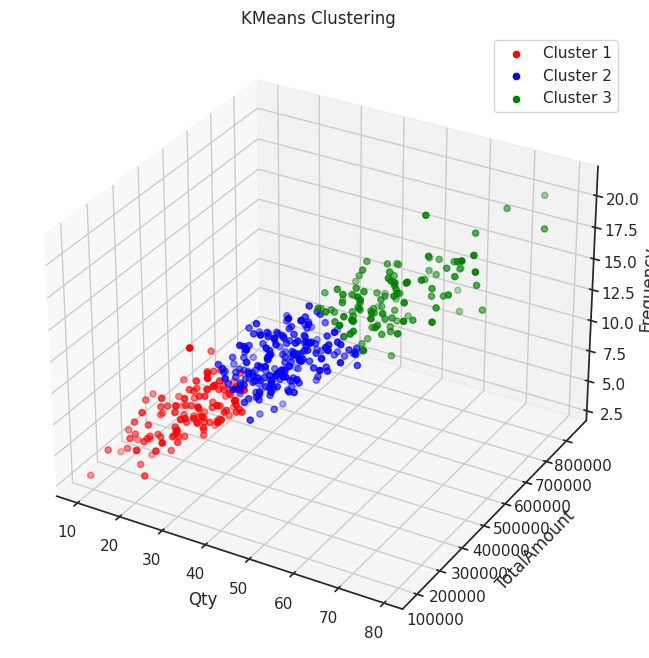

In [195]:
# Visualisasikan hasil klaster menggunakan 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Pilih warna yang berbeda untuk setiap klaster
colors = ['red', 'blue', 'green']

# Loop melalui setiap klaster dan plot data pada klaster tersebut
for i in range(k):
    cluster_data = df_clus[df_clus['Cluster'] == i]
    ax.scatter(cluster_data['Qty'], cluster_data['TotalAmount'], cluster_data['Frequency'], c=colors[i], label=f'Cluster {i+1}')

ax.set_xlabel('Qty')
ax.set_ylabel('TotalAmount')
ax.set_zlabel('Frequency')
ax.set_title('KMeans Clustering')
ax.legend()
plt.show()

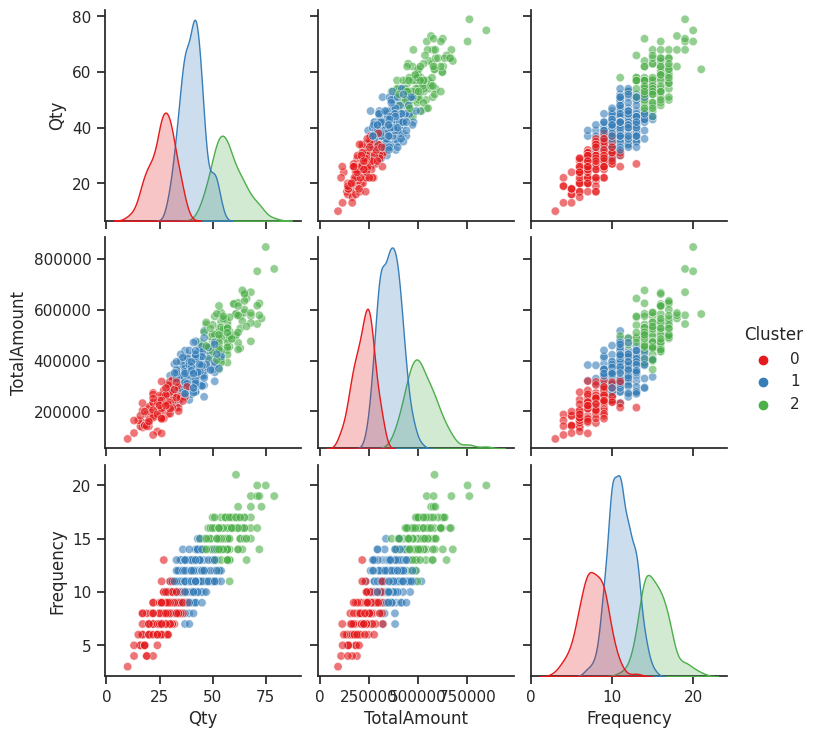

In [196]:
# Visualisasi pairplot yang sudah di-cluster
sns.set(style='ticks')
sns.pairplot(df_clus, hue='Cluster', palette='Set1', diag_kind='kde', height=2.5, plot_kws={'alpha': 0.6})
plt.show()

### Metrics

In [197]:
# Hitung silhouette score untuk hasil klaster
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.28705673297837714


## Visualization

In [198]:
# Mengganti nama kolom 'Cluster' menjadi 'Customer Category'
df_clus.rename(columns={'Cluster': 'Customer Category'}, inplace=True)

# Mengganti nilai dalam kolom 'Customer Category' dengan kategori yang sesuai
df_clus['Customer Category'] = df_clus['Customer Category'].replace({
    0: 'Low Value Customer',
    1: 'Middle Value Customer',
    2: 'High Value Customer'
})
df_clus.head()

,Qty,TotalAmount,Frequency,Customer Category
CustomerID,,,,
1,60,623300,17,High Value Customer
2,57,392300,13,High Value Customer
3,56,446200,15,High Value Customer
4,46,302500,10,Middle Value Customer
5,27,268600,7,Low Value Customer


In [199]:
# Agregasi berdasarkan 'Customer Category'
agg_df_clus = df_clus.groupby('Customer Category').agg({
    'Qty': 'mean',            # Agregasi mean untuk kolom 'Qty'
    'TotalAmount': 'sum',     # Agregasi sum untuk kolom 'TotalAmount'
    'Frequency': 'mean'       # Agregasi mean untuk kolom 'Frequency'
}).reset_index()  # Reset index agar 'Customer Category' menjadi kolom biasa

agg_df_clus

,Customer Category,Qty,TotalAmount,Frequency
0,High Value Customer,57.280702,59401200,15.315789
1,Low Value Customer,26.311475,27290100,7.614754
2,Middle Value Customer,40.549763,75351700,11.113744


In [200]:
# Skema warna yang berbeda untuk setiap kategori pelanggan
colors = ['cyan', 'lime', 'fuchsia']

# Membuat bar chart untuk kolom "Qty" dengan nilai di setiap bar
fig_qty = go.Figure(data=[go.Bar(x=agg_df_clus['Customer Category'], y=agg_df_clus['Qty'], marker_color=colors, text=agg_df_clus['Qty'], textposition='auto')])
fig_qty.update_layout(title='Bar Chart - Qty (mean)', xaxis_title='Customer Category', yaxis_title='Qty', width=800)

# Membuat bar chart untuk kolom "TotalAmount" dengan nilai di setiap bar
fig_totalamount = go.Figure(data=[go.Bar(x=agg_df_clus['Customer Category'], y=agg_df_clus['TotalAmount'], marker_color=colors, text=agg_df_clus['TotalAmount'], textposition='auto')])
fig_totalamount.update_layout(title='Bar Chart - TotalAmount (sum)', xaxis_title='Customer Category', yaxis_title='TotalAmount', width=800)

# Membuat bar chart untuk kolom "Frequency" dengan nilai di setiap bar
fig_frequency = go.Figure(data=[go.Bar(x=agg_df_clus['Customer Category'], y=agg_df_clus['Frequency'], marker_color=colors, text=agg_df_clus['Frequency'], textposition='auto')])
fig_frequency.update_layout(title='Bar Chart - Frequency (mean)', xaxis_title='Customer Category', yaxis_title='Frequency', width=800)

# Menampilkan plot
fig_qty.show()
fig_totalamount.show()
fig_frequency.show()

# RFM Customer Segmentation

## Data Preparation

In [201]:

latest_date = df['Date'].max()
df_rfm = df.groupby('CustomerID')['Date'].max().reset_index()

# Hitung Recency
df_rfm['Recency'] = (latest_date - df['Date']).dt.days

# Hitung Frequency
frequency_df = df['CustomerID'].value_counts().reset_index()
frequency_df.columns = ['CustomerID', 'Frequency']

# Hitung Monetary
monetary_df = df.groupby('CustomerID')['TotalAmount'].sum().reset_index()
monetary_df.columns = ['CustomerID', 'Monetary']

# Merge Frequency dengan DataFrame awal berdasarkan CustomerID
df_rfm = pd.merge(df_rfm, frequency_df, on='CustomerID')
df_rfm = pd.merge(df_rfm, monetary_df, on='CustomerID')

print(df_rfm.head())

   CustomerID       Date  Recency  Frequency  Monetary
0           1 2022-12-06      364         17    623300
1           2 2022-12-07      224         13    392300
2           3 2022-12-22      107         15    446200
3           4 2022-12-27       42         10    302500
4           5 2022-12-04       24          7    268600


In [202]:
# Definisikan fungsi untuk menghitung RFM Score berdasarkan kriteria
def calculate_rfm_score(recency, frequency, monetary):
    r_score = 4 if recency <= 30 else 3 if recency <= 90 else 2 if recency <= 180 else 1 if recency <= 365 else 0
    f_score = 4 if frequency >= 15 else 3 if frequency >= 10 else 2 if frequency >= 5 else 1 if frequency >= 1 else 0
    m_score = 4 if monetary >= 500000 else 3 if monetary >= 300000 else 2 if monetary >= 100000 else 1 if monetary >= 50000 else 0
    return r_score + f_score + m_score

# Hitung RFM Score
df_rfm['RFM_Score'] = df_rfm.apply(lambda row: calculate_rfm_score(row['Recency'], row['Frequency'], row['Monetary']), axis=1)


In [207]:
df_rfm.describe()

,CustomerID,Date,Recency,Frequency,Monetary,RFM_Score
count,447.000000,447,447.000000,447.000000,447.000000,447.000000
mean,224.000000,2022-11-27 19:06:50.738255104,196.798658,11.230425,362512.304251,7.416107
min,1.000000,2022-06-16 00:00:00,0.000000,3.000000,92100.000000,3.000000
25%,112.500000,2022-11-14 00:00:00,103.500000,9.000000,271750.000000,6.000000
50%,224.000000,2022-12-08 00:00:00,201.000000,11.000000,354200.000000,7.000000
75%,335.500000,2022-12-23 00:00:00,297.000000,14.000000,441200.000000,9.000000
max,447.000000,2022-12-31 00:00:00,364.000000,21.000000,846700.000000,12.000000
std,129.182042,NaN,110.525304,3.245302,124634.279184,1.646170


## Visualization

In [204]:
# Tentukan kriteria dan nilai pengganti
conditions = [
    (df_rfm['RFM_Score'] > 9),
    (df_rfm['RFM_Score'] > 6),
    (df_rfm['RFM_Score'] > 0)
]
values = ['High Value', 'Middle Value', 'Low Value']

# Mengganti nilai dalam kolom 'RFM_Score' berdasarkan kriteria dan nilai pengganti
df_rfm['Customer_Category'] = np.select(conditions, values)
df_rfm.head()

,CustomerID,Date,Recency,Frequency,Monetary,RFM_Score,Customer_Category
0,1,2022-12-06,364,17,623300,9,Middle Value
1,2,2022-12-07,224,13,392300,7,Middle Value
2,3,2022-12-22,107,15,446200,9,Middle Value
3,4,2022-12-27,42,10,302500,9,Middle Value
4,5,2022-12-04,24,7,268600,8,Middle Value


In [205]:
# Hitung jumlah pengamatan dalam setiap kategori
rfm_counts = df_rfm['Customer_Category'].value_counts()

# Visualisasi menggunakan Plotly Bar Chart
fig = go.Figure(data=[go.Bar(x=rfm_counts.index, y=rfm_counts.values, marker_color=['fuchsia', 'crimson', 'lime'])])

# Menambahkan judul dan label sumbu pada plot
fig.update_layout(title='Customer Category Counts', xaxis_title='Customer Category', yaxis_title='Counts', width=600)
fig.update_traces(text=rfm_counts.values, textposition='outside')

# Tampilkan plot
fig.show()